In [11]:
from langgraph.graph import StateGraph, START, END, add_messages
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.messages import BaseMessage, HumanMessage
from typing import TypedDict, Annotated, Literal
from pydantic import BaseModel, Field
import operator
import os
import warnings
warnings.filterwarnings("ignore")

In [12]:
load_dotenv()

PERPLEXITY_API_KEY = os.getenv("PERPLEXITY_API_KEY")

model = ChatOpenAI(
    model="sonar",                     # base Sonar model
    base_url="https://api.perplexity.ai",
    api_key=PERPLEXITY_API_KEY,
    temperature=0.7
)

In [13]:
model.invoke('what is the capital of india')

AIMessage(content='The capital of India is **New Delhi**[1][2][3][6][7].\n\nNew Delhi is a part of the larger National Capital Territory (NCT) of Delhi and serves as the seat of all three branches of the Government of India, including the Presidential Palace (Rashtrapati Bhavan), Parliament House (Sansad Bhavan), and the Supreme Court. It was officially inaugurated as the capital in 1931 after King George V moved the capital from Calcutta (now Kolkata) to Delhi in 1911[1][3][6][7].\n\nWhile "Delhi" refers to the broader metropolitan area and union territory, New Delhi specifically designates the city area that functions as the national capital[1][2].', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 6, 'total_tokens': 159, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'search_context_size': 'low', 'cost': {'input_tokens_cost': 0.0, 'output_tokens_cost': 0.0, 'request_cost': 0.005, 'total_cost': 0.005

In [14]:
class schema(TypedDict):
    message: Annotated[list[BaseMessage], add_messages]

In [15]:
def chat_node(state: schema):
    message= state['message']
    
    response  = model.invoke(message)
    
    return {"message": [response]}
    

In [16]:
graph = StateGraph(schema)

graph.add_node("chat_node", chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

chatbot= graph.compile()

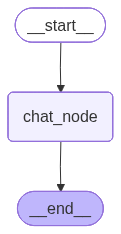

In [17]:
chatbot

In [18]:
initial_state= {"message":[HumanMessage(content= "what is the capital of india")]}

In [19]:
print(chatbot.invoke(initial_state))

{'message': [HumanMessage(content='what is the capital of india', additional_kwargs={}, response_metadata={}, id='b8a07624-f83f-4f82-978f-3c2bcacdb77a'), AIMessage(content="The capital of India is **New Delhi**. It is a municipality within the National Capital Territory of Delhi (NCT) and serves as the seat of all three branches of the Government of India, including the President's residence, Parliament, and the Supreme Court[1][2][5].\n\nNew Delhi was officially inaugurated as the capital in 1931 after the British moved the capital from Calcutta (now Kolkata) to Delhi in 1911. The city was planned and designed by British architects Edwin Lutyens and Herbert Baker[1][3][5].\n\nWhile New Delhi is the official capital, it is part of the larger Delhi metropolis, which is a union territory and includes many urban areas beyond just New Delhi itself[2][7].", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 154, 'prompt_tokens': 6, 'total_tokens': 1

In [20]:
chatbot.invoke(initial_state)['message'][-1].content

'The capital of India is **New Delhi**. It is a municipality within the National Capital Territory (NCT) of Delhi and serves as the seat of all three branches of the Government of India, including the Presidential Palace, Parliament House, and the Supreme Court[1][2][3][7][8].\n\nNew Delhi was officially inaugurated as the capital in 1931, having been planned and constructed by British architects after the 1911 decision to move the capital from Calcutta (now Kolkata)[1][3][7]. Although "Delhi" and "New Delhi" are often used interchangeably, New Delhi specifically refers to the smaller administrative area that functions as the capital within the larger Delhi metropolitan region[1][2].\n\nThus, **New Delhi** is the recognized capital city of India.'